# História das Olimpíadas - Parte 2

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

In [2]:
df_olimp = pd.read_csv('athlete_events.csv')

df_olimp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [3]:
df_brazil = df_olimp[df_olimp['NOC'] == 'BRA']
df_brazil = df_brazil.fillna(value=0)
#df_brazil = df_brazil.dropna()
df_brazil.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,0
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,0
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,0
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,0
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,0


In [4]:
df_brazil_medal = df_brazil[df_brazil['Medal']!=0]
df_brazil_medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

In [5]:
df_brazil_medal.groupby(['Sport', 'Sex'])['Height'].mean()
df_brazil_medal.groupby(['Sport', 'Sex'])['Height'].mean()[df_brazil_medal.groupby(['Sport', 'Sex'])['Height'].mean()!=0]

Sport              Sex
Athletics          F      173.000000
                   M      181.320000
Basketball         F      183.375000
                   M      148.970588
Beach Volleyball   F      162.500000
                   M      195.583333
Boxing             F      167.000000
                   M      170.750000
Canoeing           M      175.000000
Equestrianism      M      179.666667
Football           F      166.971429
                   M      171.900990
Gymnastics         M      162.750000
Judo               F      168.200000
                   M      168.764706
Modern Pentathlon  F      166.000000
Sailing            F      170.500000
                   M      183.066667
Shooting           M       87.500000
Swimming           F      165.000000
                   M      180.421053
Taekwondo          F      178.000000
                   M      190.000000
Volleyball         F      183.437500
                   M      195.361111
Name: Height, dtype: float64

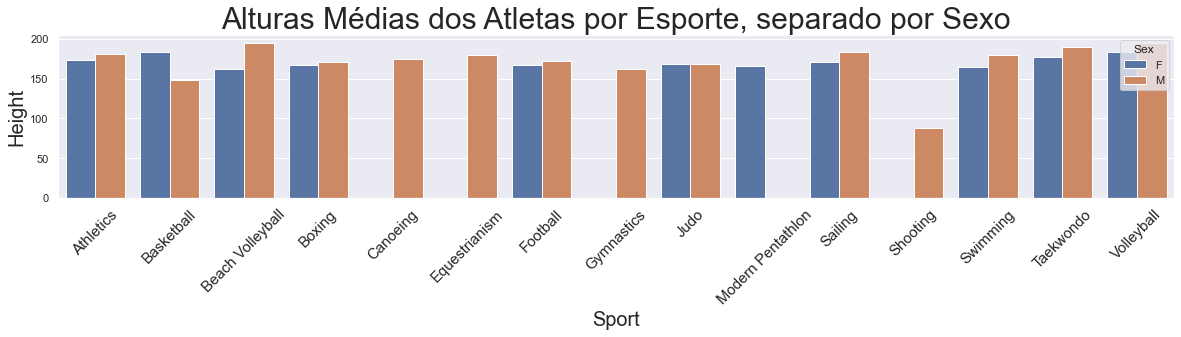

In [6]:
plt.figure(figsize=(20,3))
sns.barplot(x='Sport', y='Height', hue='Sex',
           data=df_brazil_medal.groupby(['Sport', 'Sex'])['Height'].mean()[df_brazil_medal.groupby(['Sport', 'Sex'])['Height'].mean()!=0].reset_index())

plt.xticks(rotation=45, fontsize=15);
plt.xlabel('Sport', fontsize=20)
plt.ylabel('Height', fontsize=20)
plt.title('Alturas Médias dos Atletas por Esporte, separado por Sexo', fontsize= 30);

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

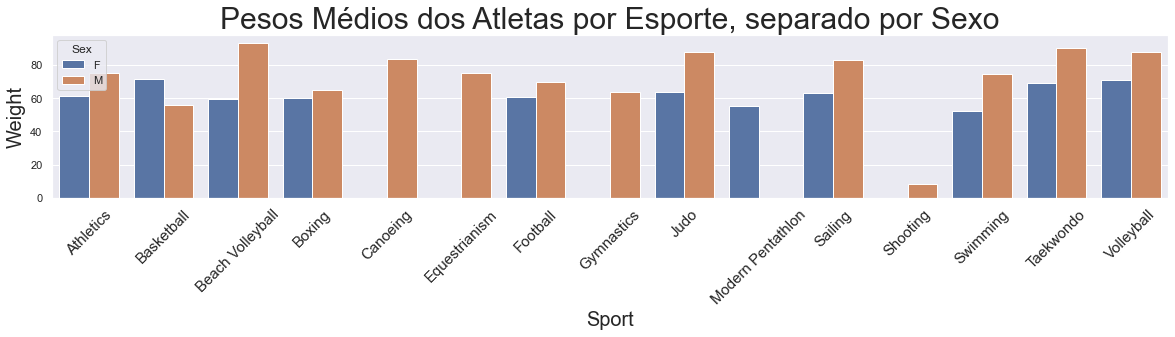

In [7]:
plt.figure(figsize=(20,3))
plt.xticks(rotation=45, fontsize=15)
sns.barplot(x='Sport', y='Weight', hue='Sex',
           data=df_brazil_medal.groupby(['Sport', 'Sex'])['Weight'].mean()[df_brazil_medal.groupby(['Sport', 'Sex'])['Weight'].mean()!=0].reset_index())
plt.xlabel('Sport', fontsize=20)
plt.ylabel('Weight', fontsize=20)
plt.title('Pesos Médios dos Atletas por Esporte, separado por Sexo', fontsize= 30);

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [8]:
df_bm = df_brazil_medal.groupby(['ID', 'Name', 'Medal'])['Medal'].size().to_frame(name = 'Qtd').reset_index()
df_bm

,ID,Name,Medal,Qtd
0,918,Ademir Roque Kaefer,Silver,2
1,925,Adenzia Aparecida Ferreira da Silva,Gold,1
2,966,Daniel Adler,Silver,1
3,1020,Adriana Aparecida dos Santos,Bronze,1
4,1020,Adriana Aparecida dos Santos,Silver,1
...,...,...,...,...
408,133931,Arthur Nabarrete Zanetti,Silver,1
409,134186,"Jos Elias ""Z Elias"" Moedim Jnior",Bronze,1
410,134190,"Jos Marco ""Z Marco"" Nobrega Ferreira de Melo",Silver,1
411,134191,"Jos Marcelo ""Z Maria"" Ferreira",Bronze,1


In [9]:
df_bm.groupby(['ID']).size().max()

3

In [10]:
df_bm_pivot = df_bm.pivot(index = 'Name', columns = 'Medal', values = 'Qtd').reset_index().rename_axis(None, axis=1)

df_bm_pivot = df_bm_pivot.reindex(columns = ['Name', 'Gold', 'Silver', 'Bronze', 'Total'])

df_bm_pivot[['Gold', 'Silver', 'Bronze']] = df_bm_pivot[['Gold', 'Silver', 'Bronze']].fillna(value = 0)

df_bm_pivot['Total'] = df_bm_pivot['Gold'] + df_bm_pivot['Silver'] + df_bm_pivot['Bronze']

df_bm_pivot.sort_values('Total', ascending = False)

,Name,Gold,Silver,Bronze,Total
283,Robert Scheidt,2.0,2.0,1.0,5.0
332,Torben Schmidt Grael,2.0,1.0,2.0,5.0
141,Gustavo Frana Borges,0.0,2.0,2.0,4.0
316,"Srgio ""Escadinha"" Dutra dos Santos",2.0,2.0,0.0,4.0
286,"Rodrigo ""Rodrigo"" Santana",1.0,2.0,0.0,3.0
...,...,...,...,...,...
143,Helen Cristina Santos Luz,0.0,0.0,1.0,1.0
142,"Hamilton ""Careca"" de Souza",0.0,1.0,0.0,1.0
138,Grazielle Pinheiro Guimares Nascimento,0.0,1.0,0.0,1.0
137,"Givanildo ""Hulk"" Vieira de Souza",0.0,1.0,0.0,1.0


In [11]:
nome_maismed = df_bm_pivot[df_bm_pivot['Total'] == df_bm_pivot['Total'].max()]
nome_maismed['Name'].values

array(['Robert Scheidt', 'Torben Schmidt Grael'], dtype=object)

In [12]:
df_bm_pivot[df_bm_pivot['Name'].isin(df_bm[df_bm['Name']
                       .isin(nome_maismed['Name'].values)]
                 ['Name'].drop_duplicates())][['Name','Gold','Silver','Bronze']]


,Name,Gold,Silver,Bronze
283,Robert Scheidt,2.0,2.0,1.0
332,Torben Schmidt Grael,2.0,1.0,2.0


In [13]:
df_bm_pivot[df_bm_pivot['Name'].isin(df_bm[df_bm['Name'].isin(nome_maismed['Name'].values)]
         ['Name'].drop_duplicates())][['Name','Gold','Silver','Bronze']]['Name']

283          Robert Scheidt
332    Torben Schmidt Grael
Name: Name, dtype: object

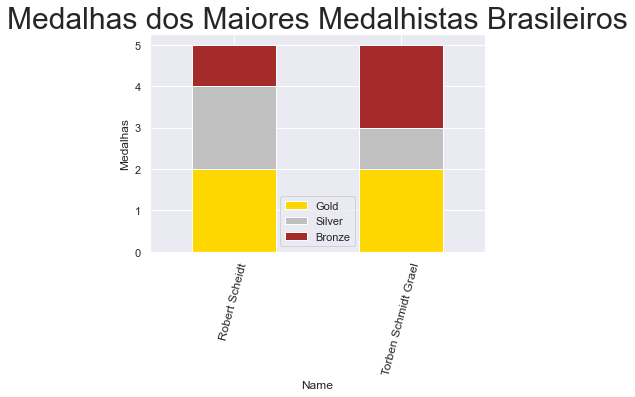

In [14]:
colors = ['gold', 'silver', 'brown']


df_bm_pivot[df_bm_pivot['Name'].isin(df_bm[df_bm['Name']
                       .isin(nome_maismed['Name'].values)]
                 ['Name'].drop_duplicates())][['Name','Gold','Silver','Bronze']].plot(kind='bar', stacked=True, color=colors, x='Name')


plt.ylabel('Medalhas')
plt.xticks(rotation=75, fontsize=12)

plt.title('Medalhas dos Maiores Medalhistas Brasileiros', fontsize= 30);

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [15]:
df_event = df_brazil_medal.drop(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Season', 'City', 'Name', 'Year'], axis=1)

df_eventmed = df_event.drop_duplicates().groupby(['Games', 'Sport', 'Event', 'Medal'])['Medal'].size().to_frame(name = 'Qtd').reset_index()
df_eventmed

,Games,Sport,Event,Medal,Qtd
0,1920 Summer,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver,1
1,1920 Summer,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze,1
2,1920 Summer,Shooting,"Shooting Men's Military Pistol, 30 metres",Gold,1
3,1948 Summer,Basketball,Basketball Men's Basketball,Bronze,1
4,1952 Summer,Athletics,Athletics Men's High Jump,Bronze,1
...,...,...,...,...,...
123,2016 Summer,Sailing,Sailing Women's Skiff,Gold,1
124,2016 Summer,Shooting,"Shooting Men's Air Pistol, 10 metres",Silver,1
125,2016 Summer,Swimming,Swimming Women's 10 kilometres Open Water,Bronze,1
126,2016 Summer,Taekwondo,Taekwondo Men's Heavyweight,Bronze,1


In [16]:
df_eventmed[(df_eventmed['Games']==2008) & (df_eventmed['Event']=="Football Men's Football")]

,Games,Sport,Event,Medal,Qtd


In [17]:
df_sportmed_pivot = df_eventmed.pivot(index = ['Games', 'Sport', 'Event'], columns = 'Medal', values = 'Qtd').reset_index().rename_axis(None, axis=1)

df_sportmed_pivot = df_sportmed_pivot.reindex(columns = ['Sport', 'Gold', 'Silver', 'Bronze', 'Total'])

df_sportmed_pivot[['Gold', 'Silver', 'Bronze']] = df_sportmed_pivot[['Gold', 'Silver', 'Bronze']].fillna(value = 0)

df_sportmed_pivot['Total'] = df_sportmed_pivot['Gold'] + df_sportmed_pivot['Silver'] + df_sportmed_pivot['Bronze']

df_sportmed_pivot.groupby('Sport')[['Gold', 'Silver', 'Bronze', 'Total']].sum().reset_index()

,Sport,Gold,Silver,Bronze,Total
0,Athletics,5.0,3.0,8.0,16.0
1,Basketball,0.0,1.0,4.0,5.0
2,Beach Volleyball,3.0,7.0,3.0,13.0
3,Boxing,1.0,1.0,3.0,5.0
4,Canoeing,0.0,2.0,1.0,3.0
5,Equestrianism,1.0,0.0,2.0,3.0
6,Football,1.0,5.0,2.0,8.0
7,Gymnastics,1.0,2.0,1.0,4.0
8,Judo,4.0,3.0,15.0,22.0
9,Modern Pentathlon,0.0,0.0,1.0,1.0


In [18]:
df_brazil_medal[(df_brazil_medal['Sport'] == 'Football') & (df_brazil_medal['Year'] == 2008)
                & (df_brazil_medal['Sex'] == 'M')]['Medal'].count()

17

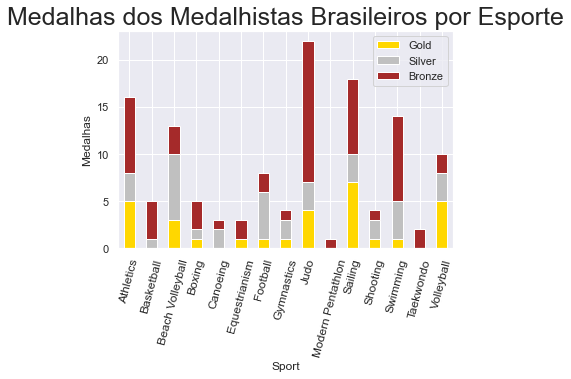

In [19]:
colors = ['gold', 'silver', 'brown']


df_sportmed_pivot.groupby('Sport')[['Gold', 'Silver', 'Bronze']].sum().reset_index().plot(kind='bar', stacked=True, color=colors, x='Sport')


plt.ylabel('Medalhas')
plt.xticks(rotation=75, fontsize=12)

plt.title('Medalhas dos Medalhistas Brasileiros por Esporte', fontsize=25);

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [20]:
df_eventmed_pivot = df_eventmed.pivot(index = ['Games', 'Event'], columns = 'Medal', values = 'Qtd').reset_index().rename_axis(None, axis=1)

df_eventmed_pivot = df_eventmed_pivot.reindex(columns = ['Event', 'Gold', 'Silver', 'Bronze', 'Total'])

df_eventmed_pivot[['Gold', 'Silver', 'Bronze']] = df_eventmed_pivot[['Gold', 'Silver', 'Bronze']].fillna(value = 0)

df_eventmed_pivot['Total'] = df_eventmed_pivot['Gold'] + df_eventmed_pivot['Silver'] + df_eventmed_pivot['Bronze']

df_eventmed_pivot.groupby('Event')[['Gold', 'Silver', 'Bronze', 'Total']].sum().reset_index()

,Event,Gold,Silver,Bronze,Total
0,Athletics Men's 200 metres,0.0,0.0,1.0,1.0
1,Athletics Men's 4 x 100 metres Relay,0.0,1.0,2.0,3.0
2,Athletics Men's 800 metres,1.0,1.0,0.0,2.0
3,Athletics Men's High Jump,0.0,0.0,1.0,1.0
4,Athletics Men's Marathon,0.0,0.0,1.0,1.0
...,...,...,...,...,...
57,Swimming Women's 10 kilometres Open Water,0.0,0.0,1.0,1.0
58,Taekwondo Men's Heavyweight,0.0,0.0,1.0,1.0
59,Taekwondo Women's Heavyweight,0.0,0.0,1.0,1.0
60,Volleyball Men's Volleyball,3.0,3.0,0.0,6.0


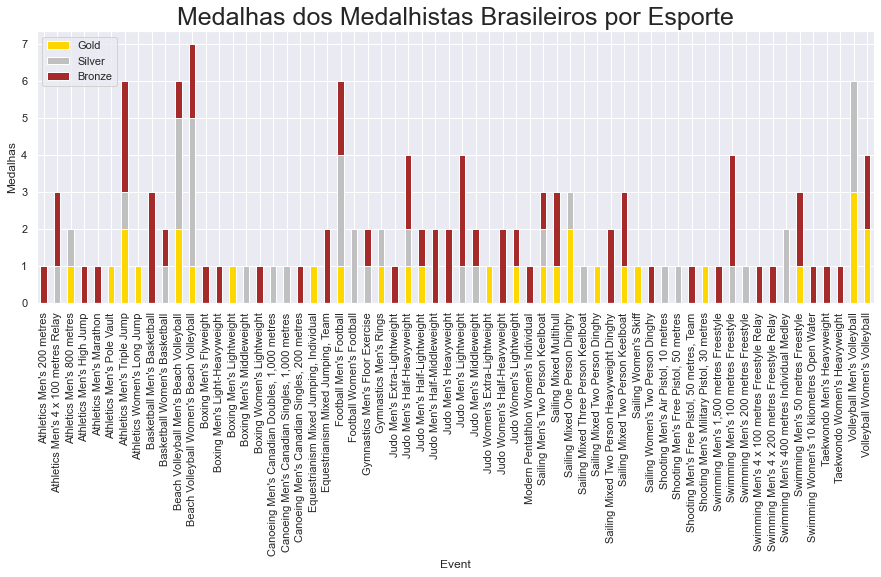

In [21]:
colors = ['gold', 'silver', 'brown']

df_eventmed_pivot.groupby('Event')[['Gold', 'Silver', 'Bronze']].sum().reset_index().plot(kind='bar', stacked=True, color=colors, x='Event', figsize=(15,5))

plt.ylabel('Medalhas')
plt.xticks(rotation=90)

plt.title('Medalhas dos Medalhistas Brasileiros por Esporte', fontsize = 25);

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [22]:
df_sportmed_pivot.groupby('Sport')['Total'].sum().reset_index()

,Sport,Total
0,Athletics,16.0
1,Basketball,5.0
2,Beach Volleyball,13.0
3,Boxing,5.0
4,Canoeing,3.0
5,Equestrianism,3.0
6,Football,8.0
7,Gymnastics,4.0
8,Judo,22.0
9,Modern Pentathlon,1.0


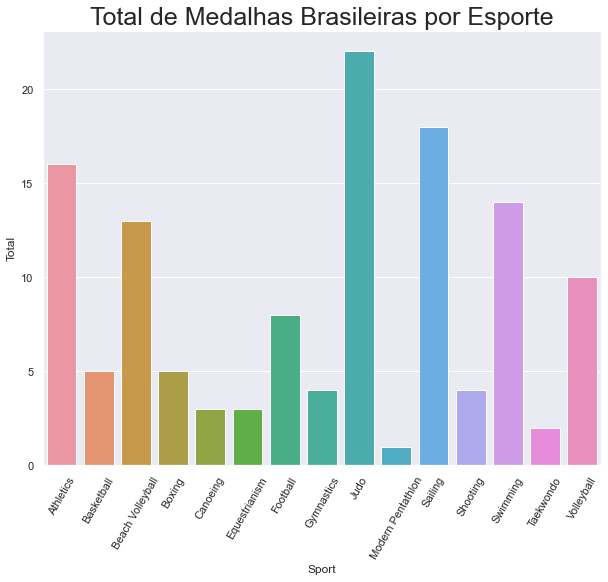

In [23]:
plt.figure(figsize = (10,8))
sns.barplot(data=df_sportmed_pivot.groupby('Sport')['Total'].sum().reset_index(),
                x = 'Sport', y = 'Total');
plt.title('Total de Medalhas Brasileiras por Esporte', fontsize = 25)
plt.xticks(rotation=60);

Repita o procedimento acima, mas com medalhas de ouro.

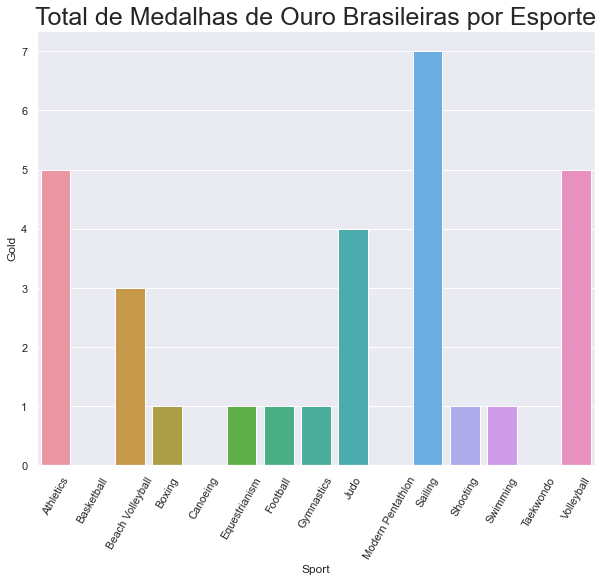

In [24]:
plt.figure(figsize = (10,8))
sns.barplot(data=df_sportmed_pivot.groupby('Sport')['Gold'].sum().reset_index(),
            y='Gold', x= 'Sport');
plt.title('Total de Medalhas de Ouro Brasileiras por Esporte', fontsize = 25)
plt.xticks(rotation=60);

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

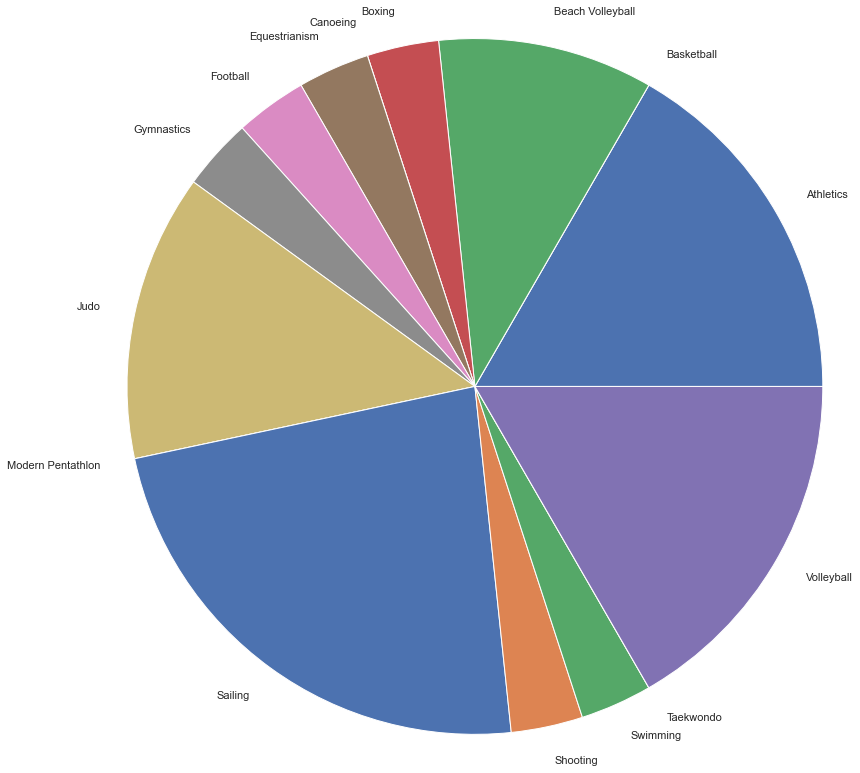

In [25]:
plt.pie(data=df_sportmed_pivot.groupby('Sport')['Gold'].sum().reset_index(),
            x='Gold', labels= 'Sport', radius=4);

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [26]:
df_gamesmed_pivot = df_eventmed.pivot(index = ['Games', 'Sport', 'Event'], columns = 'Medal', values = 'Qtd').reset_index().rename_axis(None, axis=1)

df_gamesmed_pivot = df_gamesmed_pivot.reindex(columns = ['Games', 'Gold', 'Silver', 'Bronze', 'Total'])

df_gamesmed_pivot[['Gold', 'Silver', 'Bronze']] = df_sportmed_pivot[['Gold', 'Silver', 'Bronze']].fillna(value = 0)

df_gamesmed_pivot['Total'] = df_gamesmed_pivot['Gold'] + df_gamesmed_pivot['Silver'] + df_gamesmed_pivot['Bronze']

df_gamesmed_pivot.groupby('Games')[['Gold', 'Silver', 'Bronze']].sum().reset_index()

,Games,Gold,Silver,Bronze
0,1920 Summer,1.0,1.0,1.0
1,1948 Summer,0.0,0.0,1.0
2,1952 Summer,1.0,0.0,2.0
3,1956 Summer,1.0,0.0,0.0
4,1960 Summer,0.0,0.0,2.0
5,1964 Summer,0.0,0.0,1.0
6,1968 Summer,0.0,1.0,2.0
7,1972 Summer,0.0,0.0,2.0
8,1976 Summer,0.0,0.0,2.0
9,1980 Summer,2.0,0.0,2.0


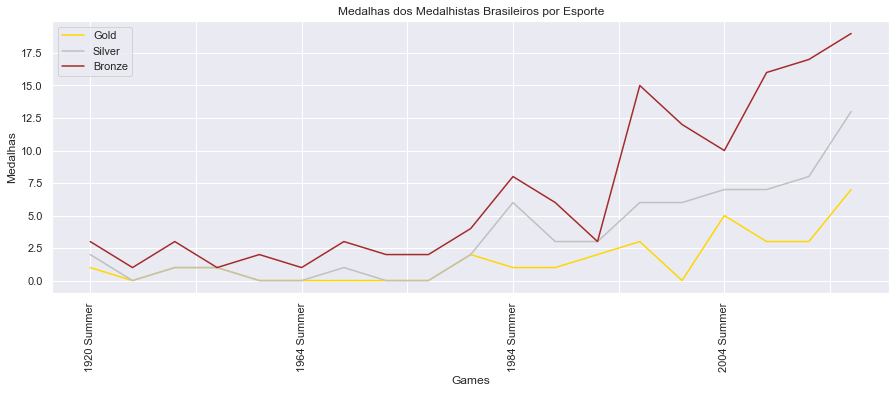

In [27]:
colors = ['gold', 'silver', 'brown']

df_gamesmed_pivot.groupby('Games')[['Gold', 'Silver', 'Bronze']].sum().reset_index().plot(kind='line', stacked=True, color=colors, x='Games', figsize=(15,5))

plt.ylabel('Medalhas')
plt.xticks(rotation=90)

plt.title('Medalhas dos Medalhistas Brasileiros por Esporte');

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [28]:
df_mv = df_olimp[df_olimp['Season'] == 'Summer']
df_mv = df_mv.fillna(value=0)
df_mv = df_mv[df_mv['Medal']!=0]
df_mv.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [29]:
df_mv_nome = df_mv.drop_duplicates().groupby(['ID', 'Name', 'Medal'])['Medal'].size().to_frame(name = 'Qtd').reset_index()
df_mv_nome.head()

,ID,Name,Medal,Qtd
0,4,Edgar Lindenau Aabye,Gold,1
1,15,Arvo Ossian Aaltonen,Bronze,2
2,17,Paavo Johannes Aaltonen,Bronze,2
3,17,Paavo Johannes Aaltonen,Gold,3
4,21,Ragnhild Margrethe Aamodt,Gold,1


Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

In [30]:
df_mv_nome_pivot = df_mv_nome.pivot(index = ['ID', 'Name'], columns = 'Medal', values = 'Qtd').reset_index().rename_axis(None, axis=1)

df_mv_nome_pivot = df_mv_nome_pivot.reindex(columns = ['Name', 'Gold', 'Silver', 'Bronze', 'Total'])

df_mv_nome_pivot[['Gold', 'Silver', 'Bronze']] = df_mv_nome_pivot[['Gold', 'Silver', 'Bronze']].fillna(value = 0)

df_mv_nome_pivot['Total'] = df_mv_nome_pivot['Gold'] + df_mv_nome_pivot['Silver'] + df_mv_nome_pivot['Bronze']

df_mv_nome_pivot = df_mv_nome_pivot.groupby('Name')[['Gold', 'Silver', 'Bronze', 'Total']].sum().reset_index()

df_mv_nome_pivot

,Name,Gold,Silver,Bronze,Total
0,A. Albert,1.0,0.0,0.0,1.0
1,A. Dubois,0.0,1.0,1.0,2.0
2,"A. Joshua ""Josh"" West",0.0,1.0,0.0,1.0
3,A. Lawry,0.0,1.0,0.0,1.0
4,A. M. Woods,0.0,1.0,0.0,1.0
...,...,...,...,...,...
24540,va Grard-Novk,1.0,2.0,1.0,4.0
24541,va Rakusz,0.0,1.0,1.0,2.0
24542,va Risztov,1.0,0.0,0.0,1.0
24543,va Szkely (-Gyarmati),1.0,1.0,0.0,2.0


In [31]:
df_mv_nome_pivot[df_mv_nome_pivot['Total']==1].count()

Name      18669
Gold      18669
Silver    18669
Bronze    18669
Total     18669
dtype: int64

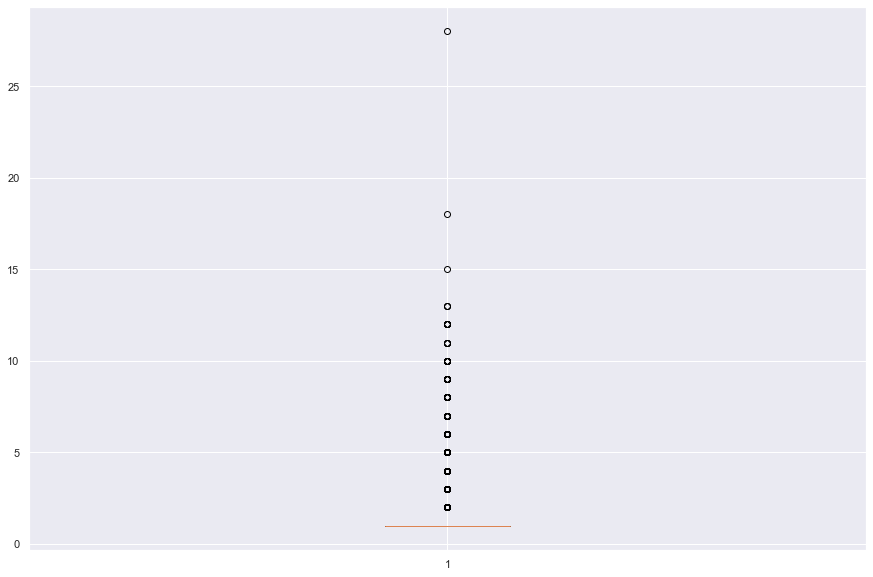

In [85]:
fig, ax = plt.subplots(nrows=1, ncols= 1, figsize=(15,10))
ax.boxplot(df_mv_nome_pivot['Total']);

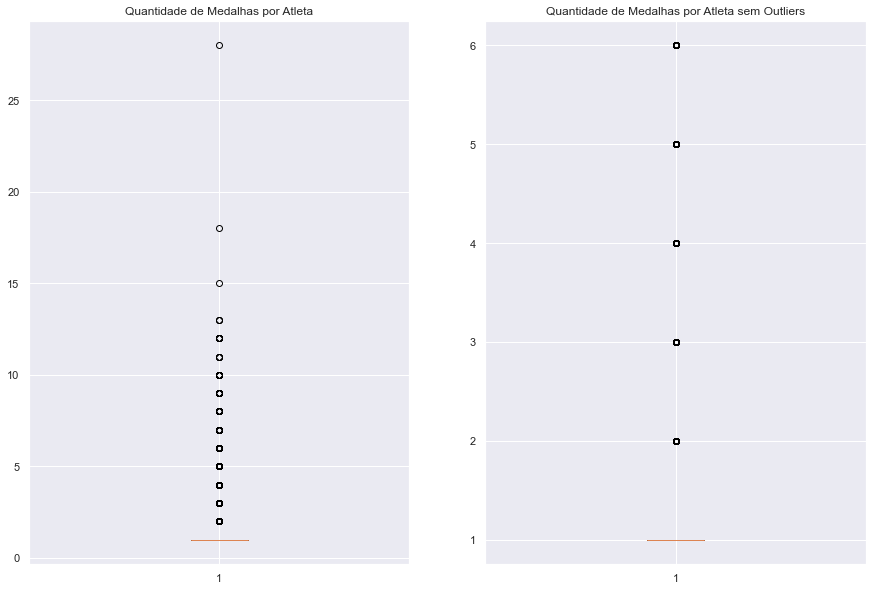

In [87]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,10))
ax[0].boxplot(df_mv_nome_pivot['Total'])
ax[0].set_title('Quantidade de Medalhas por Atleta');

quantil = df_mv_nome_pivot.quantile([0, 0.995])

df_mv_nome_sem_out = df_mv_nome_pivot[(df_mv_nome_pivot['Total'] >= quantil.loc[0, 'Total'])
                              & (df_mv_nome_pivot['Total'] <= quantil.loc[0.995, 'Total'])]


ax[1].boxplot(df_mv_nome_sem_out['Total'])
ax[1].set_title('Quantidade de Medalhas por Atleta sem Outliers');

In [34]:
df_mv_nome_pivot.groupby('Total')['Name'].size()

Total
1.0     18669
2.0      3943
3.0      1137
4.0       421
5.0       165
6.0        90
7.0        40
8.0        30
9.0        19
10.0       12
11.0        5
12.0        8
13.0        3
15.0        1
18.0        1
28.0        1
Name: Name, dtype: int64

In [35]:
df_mv_nome_sem_out['Total'].drop_duplicates().values

array([1., 2., 3., 4., 5., 6.])

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

In [36]:
df_mv_pais = df_mv.drop_duplicates().groupby(['NOC', 'Medal'])['Medal'].size().to_frame(name = 'Qtd').reset_index()
df_mv_pais.head()

,NOC,Medal,Qtd
0,AFG,Bronze,2
1,AHO,Silver,1
2,ALG,Bronze,8
3,ALG,Gold,5
4,ALG,Silver,4


In [37]:
df_mv_pais_pivot = df_mv_pais.pivot(index = ['NOC'], columns = 'Medal', values = 'Qtd').reset_index().rename_axis(None, axis=1)

df_mv_pais_pivot = df_mv_pais_pivot.reindex(columns = ['NOC', 'Gold', 'Silver', 'Bronze', 'Total'])

df_mv_pais_pivot[['Gold', 'Silver', 'Bronze']] = df_mv_pais_pivot[['Gold', 'Silver', 'Bronze']].fillna(value = 0)

df_mv_pais_pivot['Total'] = df_mv_pais_pivot['Gold'] + df_mv_pais_pivot['Silver'] + df_mv_pais_pivot['Bronze']

df_mv_pais_pivot = df_mv_pais_pivot.groupby('NOC')[['Gold', 'Silver', 'Bronze', 'Total']].sum().reset_index()

df_mv_pais_pivot

,NOC,Gold,Silver,Bronze,Total
0,AFG,0.0,0.0,2.0,2.0
1,AHO,0.0,1.0,0.0,1.0
2,ALG,5.0,4.0,8.0,17.0
3,ANZ,20.0,4.0,5.0,29.0
4,ARG,91.0,92.0,91.0,274.0
...,...,...,...,...,...
142,VIE,1.0,3.0,0.0,4.0
143,WIF,0.0,0.0,5.0,5.0
144,YUG,130.0,161.0,92.0,383.0
145,ZAM,0.0,1.0,1.0,2.0


In [38]:
df_mv_pais_pivot_ouro = df_mv_pais_pivot[['NOC', 'Gold']].sort_values('Gold', ascending=False)
df_mv_pais_pivot_ouro

,NOC,Gold
139,USA,2472.0
137,URS,832.0
46,GBR,635.0
49,GER,592.0
67,ITA,518.0
...,...,...
92,NAM,0.0
95,NIG,0.0
100,PAR,0.0
102,PHI,0.0


In [39]:
df_mv_pais10_pivot_ouro = df_mv_pais_pivot[['NOC', 'Gold']].sort_values('Gold', ascending=False).head(10)
df_mv_pais10_pivot_ouro

,NOC,Gold
139,USA,2472.0
137,URS,832.0
46,GBR,635.0
49,GER,592.0
67,ITA,518.0
43,FRA,463.0
57,HUN,432.0
121,SWE,354.0
6,AUS,342.0
47,GDR,339.0


In [40]:
n = 10

df_mv_pais_pivot_ouro = df_mv_pais_pivot_ouro.iloc[n: , :]

df_mv_pais_pivot_ouro['Gold'] = df_mv_pais_pivot_ouro['Gold'].sum()
df_mv_pais_pivot_ouro['NOC'] = 'Outros'

df_mv_pais_pivot_ouro = df_mv_pais_pivot_ouro.drop_duplicates()
df_mv_pais_pivot_ouro

<ipython-input-40-b7a3cdb28f5a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mv_pais_pivot_ouro['Gold'] = df_mv_pais_pivot_ouro['Gold'].sum()
<ipython-input-40-b7a3cdb28f5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mv_pais_pivot_ouro['NOC'] = 'Outros'


,NOC,Gold
22,Outros,4477.0


In [41]:
df_pais_ouro = pd.concat([df_mv_pais10_pivot_ouro, df_mv_pais_pivot_ouro]).reset_index()

df_pais_ouro

,index,NOC,Gold
0,139,USA,2472.0
1,137,URS,832.0
2,46,GBR,635.0
3,49,GER,592.0
4,67,ITA,518.0
5,43,FRA,463.0
6,57,HUN,432.0
7,121,SWE,354.0
8,6,AUS,342.0
9,47,GDR,339.0


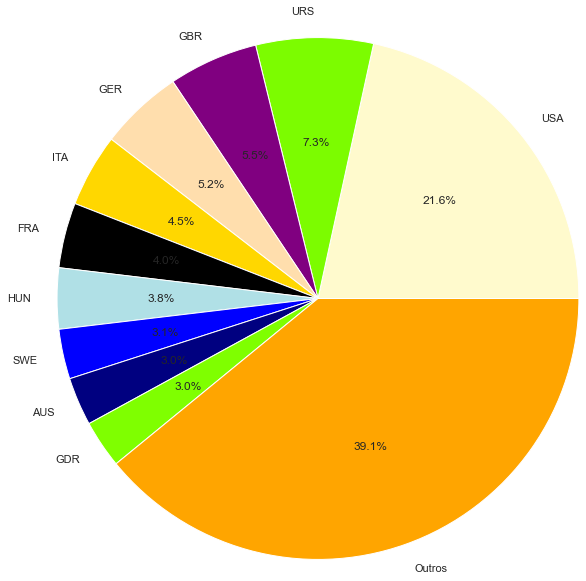

In [42]:
#mcolors.TABLEAU_COLORS
#mcolors.BASE_COLORS
#mcolors.CSS4_COLORS

import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 20)

plt.pie(data=df_pais_ouro,
            x='Gold', labels= 'NOC', radius=3, autopct='%1.1f%%', colors = colors);

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

In [43]:
df_mv_pais_pivot_total = df_mv_pais_pivot[['NOC', 'Total']].sort_values('Total', ascending=False)
df_mv_pais_pivot_total

,NOC,Total
139,USA,5002.0
137,URS,2063.0
46,GBR,1984.0
49,GER,1779.0
43,FRA,1617.0
...,...,...
63,IRQ,1.0
66,ISV,1.0
125,TGA,1.0
69,JOR,1.0


In [44]:
df_mv_pais10_pivot_total = df_mv_pais_pivot[['NOC', 'Total']].sort_values('Total', ascending=False).head(10)
df_mv_pais10_pivot_total

,NOC,Total
139,USA,5002.0
137,URS,2063.0
46,GBR,1984.0
49,GER,1779.0
43,FRA,1617.0
67,ITA,1446.0
6,AUS,1304.0
57,HUN,1123.0
121,SWE,1108.0
93,NED,918.0


In [45]:
n = 10

df_mv_pais_pivot_total = df_mv_pais_pivot_total.iloc[n: , :]

df_mv_pais_pivot_total['Total'] = df_mv_pais_pivot_total['Total'].sum()
df_mv_pais_pivot_total['NOC'] = 'Outros'

df_mv_pais_pivot_total = df_mv_pais_pivot_total.drop_duplicates()
df_mv_pais_pivot_total

<ipython-input-45-927f7b5df564>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mv_pais_pivot_total['Total'] = df_mv_pais_pivot_total['Total'].sum()
<ipython-input-45-927f7b5df564>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mv_pais_pivot_total['NOC'] = 'Outros'


,NOC,Total
22,Outros,15733.0


In [46]:
df_mv_pais_total = pd.concat([df_mv_pais10_pivot_total, df_mv_pais_pivot_total]).reset_index()

df_mv_pais_total

,index,NOC,Total
0,139,USA,5002.0
1,137,URS,2063.0
2,46,GBR,1984.0
3,49,GER,1779.0
4,43,FRA,1617.0
5,67,ITA,1446.0
6,6,AUS,1304.0
7,57,HUN,1123.0
8,121,SWE,1108.0
9,93,NED,918.0


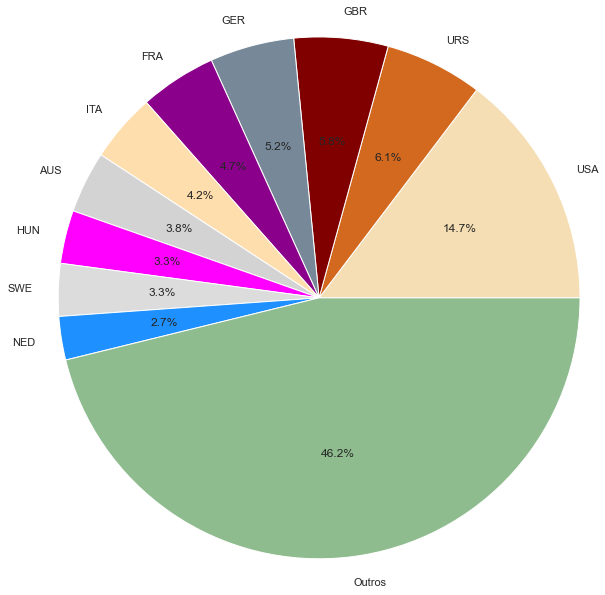

In [47]:
#mcolors.TABLEAU_COLORS
#mcolors.BASE_COLORS
#mcolors.CSS4_COLORS

import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 20)

plt.pie(data=df_mv_pais_total,
            x='Total', labels= 'NOC', radius=3, autopct='%1.1f%%', colors = colors);

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

In [48]:
df_pais_total = df_mv_pais_pivot[['NOC', 'Gold', 'Silver', 'Bronze', 'Total']].sort_values('Total', ascending=False)
df_pais_total

,NOC,Gold,Silver,Bronze,Total
139,USA,2472.0,1333.0,1197.0,5002.0
137,URS,832.0,635.0,596.0,2063.0
46,GBR,635.0,729.0,620.0,1984.0
49,GER,592.0,538.0,649.0,1779.0
43,FRA,463.0,567.0,587.0,1617.0
...,...,...,...,...,...
63,IRQ,0.0,0.0,1.0,1.0
66,ISV,0.0,1.0,0.0,1.0
125,TGA,0.0,1.0,0.0,1.0
69,JOR,1.0,0.0,0.0,1.0


In [49]:
df_pais10_total = df_mv_pais_pivot[['NOC', 'Gold', 'Silver', 'Bronze', 'Total']].sort_values('Total', ascending=False).head(10)
df_pais10_total

,NOC,Gold,Silver,Bronze,Total
139,USA,2472.0,1333.0,1197.0,5002.0
137,URS,832.0,635.0,596.0,2063.0
46,GBR,635.0,729.0,620.0,1984.0
49,GER,592.0,538.0,649.0,1779.0
43,FRA,463.0,567.0,587.0,1617.0
67,ITA,518.0,474.0,454.0,1446.0
6,AUS,342.0,452.0,510.0,1304.0
57,HUN,432.0,328.0,363.0,1123.0
121,SWE,354.0,396.0,358.0,1108.0
93,NED,245.0,302.0,371.0,918.0


In [50]:
n = 10

df_pais_total = df_pais_total.iloc[n: , :]

df_pais_total[['Gold', 'Silver', 'Bronze', 'Total']] = df_pais_total[['Gold', 'Silver', 'Bronze', 'Total']].sum()
df_pais_total['NOC'] = 'Outros'

df_pais_total = df_pais_total.drop_duplicates()
df_pais_total

<ipython-input-50-56e623cd0200>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pais_total[['Gold', 'Silver', 'Bronze', 'Total']] = df_pais_total[['Gold', 'Silver', 'Bronze', 'Total']].sum()
/opt/anaconda3/envs/DSdegree/lib/python3.9/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)
<ipython-input-50-56e623cd0200>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,NOC,Gold,Silver,Bronze,Total
22,Outros,4571.0,5458.0,5704.0,15733.0


In [51]:
df_pais_total = pd.concat([df_pais10_total, df_pais_total]).reset_index(drop=True)

df_pais_total

,NOC,Gold,Silver,Bronze,Total
0,USA,2472.0,1333.0,1197.0,5002.0
1,URS,832.0,635.0,596.0,2063.0
2,GBR,635.0,729.0,620.0,1984.0
3,GER,592.0,538.0,649.0,1779.0
4,FRA,463.0,567.0,587.0,1617.0
5,ITA,518.0,474.0,454.0,1446.0
6,AUS,342.0,452.0,510.0,1304.0
7,HUN,432.0,328.0,363.0,1123.0
8,SWE,354.0,396.0,358.0,1108.0
9,NED,245.0,302.0,371.0,918.0


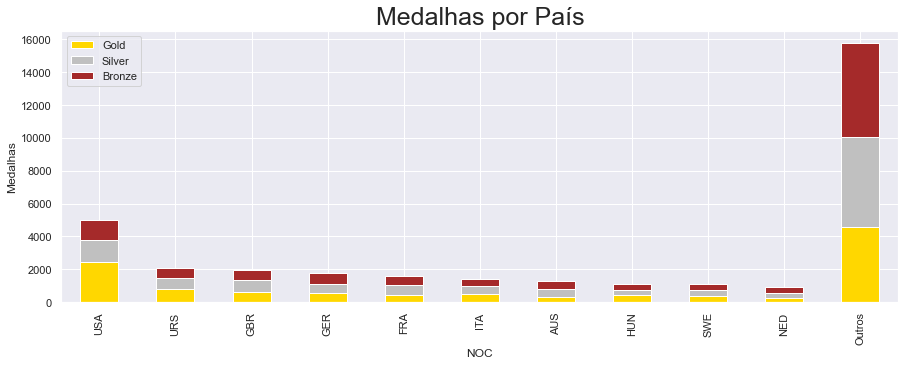

In [52]:
colors = ['gold', 'silver', 'brown']

df_pais_total[['NOC', 'Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=colors, x='NOC', figsize=(15,5))

plt.ylabel('Medalhas')
plt.xticks(rotation=90)

plt.title('Medalhas por País', fontsize = 25);

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

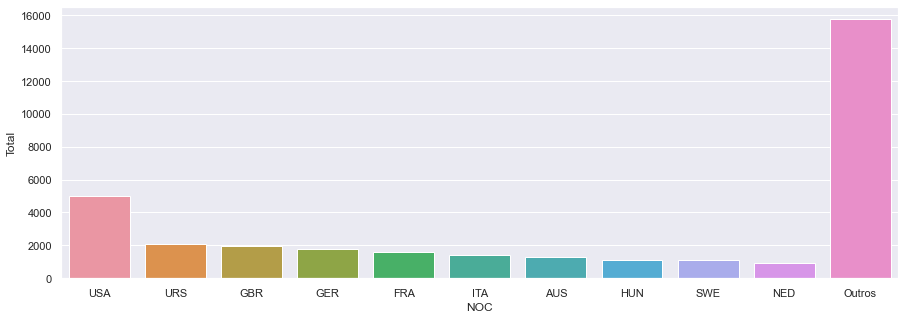

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(data = df_pais_total, x = 'NOC', y = 'Total');

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

In [54]:
df_bm_pivot[df_bm_pivot['Name'].isin(df_bm[df_bm['Name']
                       .isin(nome_maismed['Name'].values)]
                 ['Name'].drop_duplicates())][['Name','Gold','Silver','Bronze']]


,Name,Gold,Silver,Bronze
283,Robert Scheidt,2.0,2.0,1.0
332,Torben Schmidt Grael,2.0,1.0,2.0


In [55]:
df_bm_pivot.head()

,Name,Gold,Silver,Bronze,Total
0,Ademir Roque Kaefer,0.0,2.0,0.0,2.0
1,Adenzia Aparecida Ferreira da Silva,1.0,0.0,0.0,1.0
2,Adhemar Ferreira da Silva,2.0,0.0,0.0,2.0
3,"Adriana ""Adrianinha"" Moiss Pinto",0.0,0.0,1.0,1.0
4,Adriana Aparecida dos Santos,0.0,1.0,1.0,2.0


In [56]:
df_bn = df_bm_pivot[df_bm_pivot['Name'].isin(df_bm[df_bm['Name']
           .isin(nome_maismed['Name'].values)]
         ['Name'].drop_duplicates())][['Name','Gold','Silver','Bronze']]['Name'].values


df_bn

array(['Robert Scheidt', 'Torben Schmidt Grael'], dtype=object)

In [57]:
df_brazil_medal[df_brazil_medal['Name'].isin(df_bn)][['Name', 'Sport']].drop_duplicates().sort_values('Sport')

,Name,Sport
83125,Torben Schmidt Grael,Sailing
212472,Robert Scheidt,Sailing


In [58]:
df_bs = df_brazil_medal[df_brazil_medal['Name'].isin(df_bn)]['Sport'].drop_duplicates().values
df_bs

array(['Sailing'], dtype=object)

In [59]:
df_mns = df_mv[df_mv['Sport'].isin(df_bs)][['Name', 'Sport', 'Medal']]
df_mns.head()

,Name,Sport,Medal
117,Thomas Valentin Aas,Sailing,Gold
188,Alejandro Abascal Garca,Sailing,Gold
700,Egil Sten Abel,Sailing,Silver
1733,Daniel Adler,Sailing,Silver
2062,Henrik Agersborg,Sailing,Bronze


In [60]:
df_mns = df_mns.groupby(['Name', 'Sport', 'Medal'])['Medal'].size().to_frame(name = 'Qtd').reset_index()
df_mns

,Name,Sport,Medal,Qtd
0,A. Dubois,Sailing,Bronze,1
1,A. Dubois,Sailing,Silver,1
2,Aage Birch,Sailing,Silver,1
3,Aage Hy Pedersen,Sailing,Silver,1
4,Aaron John McIntosh,Sailing,Bronze,1
...,...,...,...,...
1135,ime Fantela,Sailing,Gold,1
1136,ke Carl Magnus Bergqvist,Sailing,Gold,1
1137,mile Franois Cornellie,Sailing,Gold,1
1138,mile Jean-Fontaine,Sailing,Bronze,1


In [61]:
df_mns_pivot = df_mns.pivot(index = ['Name', 'Sport'], columns = 'Medal', values = 'Qtd').reset_index().rename_axis(None, axis=1)

df_mns_pivot = df_mns_pivot.reindex(columns = ['Name', 'Sport', 'Gold', 'Silver', 'Bronze', 'Total'])

df_mns_pivot[['Gold', 'Silver', 'Bronze']] = df_mns_pivot[['Gold', 'Silver', 'Bronze']].fillna(value = 0)

df_mns_pivot['Total'] = df_mns_pivot['Gold'] + df_mns_pivot['Silver'] + df_mns_pivot['Bronze']

df_mns_pivot.groupby('Name')[['Sport', 'Gold', 'Silver', 'Bronze']].sum().reset_index()

df_mns_pivot.sort_values('Total', ascending = False)

,Name,Sport,Gold,Silver,Bronze,Total
128,"Charles Benedict ""Ben"" Ainslie",Sailing,4.0,1.0,0.0,5.0
832,Robert Scheidt,Sailing,2.0,2.0,1.0,5.0
947,Torben Schmidt Grael,Sailing,2.0,1.0,2.0,5.0
957,Valentyn Hryhorovych Mankin,Sailing,3.0,1.0,0.0,4.0
481,Jochen Schmann,Sailing,3.0,1.0,0.0,4.0
...,...,...,...,...,...,...
362,Hans Anders Ekstrm,Sailing,0.0,0.0,1.0,1.0
363,Hans Carl Johan Walln,Sailing,0.0,1.0,0.0,1.0
364,"Hans Christopher ""Chris"" Steinfeld",Sailing,0.0,1.0,0.0,1.0
365,Hans Erik Dittmar,Sailing,0.0,0.0,1.0,1.0


In [62]:
df_mns_pivot.sort_values('Total', ascending = False).iloc[:3, :5]


,Name,Sport,Gold,Silver,Bronze
128,"Charles Benedict ""Ben"" Ainslie",Sailing,4.0,1.0,0.0
832,Robert Scheidt,Sailing,2.0,2.0,1.0
947,Torben Schmidt Grael,Sailing,2.0,1.0,2.0


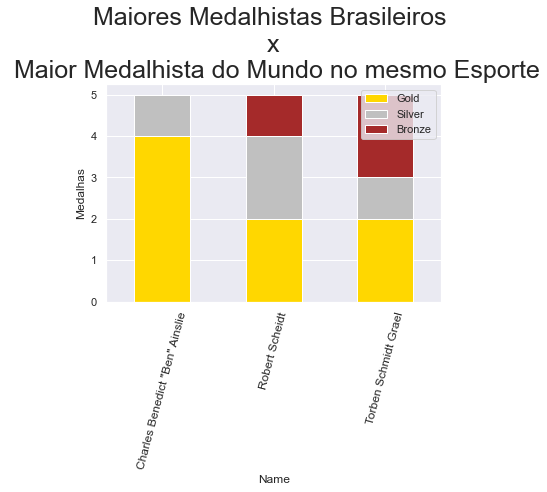

In [63]:
colors = ['gold', 'silver', 'brown']


df_mns_pivot.sort_values('Total', ascending = False).iloc[:3, :5].plot(kind='bar', stacked=True, color=colors, x='Name')



plt.ylabel('Medalhas')
plt.xticks(rotation=75, fontsize=12)

plt.title('Maiores Medalhistas Brasileiros \n x \n Maior Medalhista do Mundo no mesmo Esporte', fontsize= 25);

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

In [64]:
df_sportmed_br = df_sportmed_pivot.groupby('Sport')[['Gold', 'Silver', 'Bronze', 'Total']].sum().reset_index()

df_sportmed_br.sort_values('Total', ascending = False)

,Sport,Gold,Silver,Bronze,Total
8,Judo,4.0,3.0,15.0,22.0
10,Sailing,7.0,3.0,8.0,18.0
0,Athletics,5.0,3.0,8.0,16.0
12,Swimming,1.0,4.0,9.0,14.0
2,Beach Volleyball,3.0,7.0,3.0,13.0
14,Volleyball,5.0,3.0,2.0,10.0
6,Football,1.0,5.0,2.0,8.0
1,Basketball,0.0,1.0,4.0,5.0
3,Boxing,1.0,1.0,3.0,5.0
7,Gymnastics,1.0,2.0,1.0,4.0


In [65]:
sport_maismed_br = df_sportmed_br[df_sportmed_br['Total'] == df_sportmed_br['Total'].max()]['Sport']

sport_maismed_br = sport_maismed_br.tolist()

sport_maismed_br

['Judo']

In [66]:
df_sport_maismed_br = df_sportmed_br.sort_values('Total', ascending = False).iloc[:1, :5]

df_sport_maismed_br

,Sport,Gold,Silver,Bronze,Total
8,Judo,4.0,3.0,15.0,22.0


In [67]:
df_mv.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold


In [68]:
df_mv_sport = df_mv.drop_duplicates().groupby(['NOC', 'Sport', 'Medal'])['Medal'].size().to_frame(name = 'Qtd').reset_index()

df_mv_sport.head()

,NOC,Sport,Medal,Qtd
0,AFG,Taekwondo,Bronze,2
1,AHO,Sailing,Silver,1
2,ALG,Athletics,Bronze,2
3,ALG,Athletics,Gold,4
4,ALG,Athletics,Silver,3


In [69]:
df_mv_sport_pivot = df_mv_sport.pivot(index = ['NOC', 'Sport'], columns = 'Medal', values = 'Qtd').reset_index().rename_axis(None, axis=1)

df_mv_sport_pivot = df_mv_sport_pivot.reindex(columns = ['NOC', 'Sport', 'Gold', 'Silver', 'Bronze', 'Total'])

df_mv_sport_pivot[['Gold', 'Silver', 'Bronze']] = df_mv_sport_pivot[['Gold', 'Silver', 'Bronze']].fillna(value = 0)

df_mv_sport_pivot['Total'] = df_mv_sport_pivot['Gold'] + df_mv_sport_pivot['Silver'] + df_mv_sport_pivot['Bronze']

df_mv_sport_pivot = df_mv_sport_pivot.groupby(['NOC', 'Sport'])[['Gold', 'Silver', 'Bronze', 'Total']].sum().reset_index()

df_mv_sport_pivot.head()

,NOC,Sport,Gold,Silver,Bronze,Total
0,AFG,Taekwondo,0.0,0.0,2.0,2.0
1,AHO,Sailing,0.0,1.0,0.0,1.0
2,ALG,Athletics,4.0,3.0,2.0,9.0
3,ALG,Boxing,1.0,0.0,5.0,6.0
4,ALG,Judo,0.0,1.0,1.0,2.0


In [70]:
df_mv_judo = df_mv_sport_pivot[df_mv_sport_pivot['Sport'].isin(sport_maismed_br)]

df_mv_judo[df_mv_judo['Total'] == df_mv_judo['Total'].max()]

df_mv_judo = df_mv_judo[df_mv_judo['Total'] == df_mv_judo['Total'].max()]

In [71]:
df_judo = pd.concat([df_mv_judo, df_sport_maismed_br])

df_judo = df_judo.fillna('BRA')

df_judo

,NOC,Sport,Gold,Silver,Bronze,Total
653,JPN,Judo,39.0,19.0,26.0,84.0
8,BRA,Judo,4.0,3.0,15.0,22.0


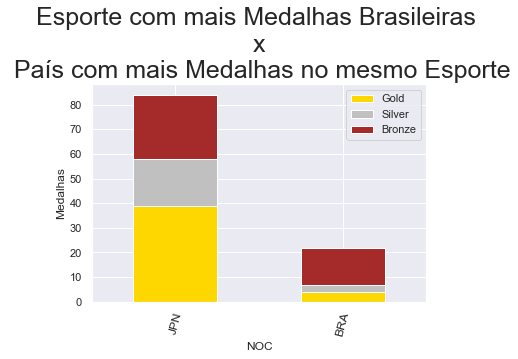

In [72]:
colors = ['gold', 'silver', 'brown']


df_judo[['NOC', 'Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=colors, x='NOC')



plt.ylabel('Medalhas')
plt.xticks(rotation=75, fontsize=12)

plt.title('Esporte com mais Medalhas Brasileiras \n x \n País com mais Medalhas no mesmo Esporte', fontsize= 25);

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.

In [73]:
df_outro_pais = df_mv_pais_pivot[['NOC', 'Gold', 'Silver', 'Bronze', 'Total']]
df_outro_pais

,NOC,Gold,Silver,Bronze,Total
0,AFG,0.0,0.0,2.0,2.0
1,AHO,0.0,1.0,0.0,1.0
2,ALG,5.0,4.0,8.0,17.0
3,ANZ,20.0,4.0,5.0,29.0
4,ARG,91.0,92.0,91.0,274.0
...,...,...,...,...,...
142,VIE,1.0,3.0,0.0,4.0
143,WIF,0.0,0.0,5.0,5.0
144,YUG,130.0,161.0,92.0,383.0
145,ZAM,0.0,1.0,1.0,2.0


In [74]:
df_pais10 = df_pais_total.drop(index=10)
df_pais10

,NOC,Gold,Silver,Bronze,Total
0,USA,2472.0,1333.0,1197.0,5002.0
1,URS,832.0,635.0,596.0,2063.0
2,GBR,635.0,729.0,620.0,1984.0
3,GER,592.0,538.0,649.0,1779.0
4,FRA,463.0,567.0,587.0,1617.0
5,ITA,518.0,474.0,454.0,1446.0
6,AUS,342.0,452.0,510.0,1304.0
7,HUN,432.0,328.0,363.0,1123.0
8,SWE,354.0,396.0,358.0,1108.0
9,NED,245.0,302.0,371.0,918.0


In [75]:
df_brasil_total = df_mv_pais_pivot[df_mv_pais_pivot['NOC'] == 'BRA']

df_brasil_total

,NOC,Gold,Silver,Bronze,Total
17,BRA,109.0,175.0,191.0,475.0


In [76]:
n = 10

df_outro_pais = df_outro_pais.drop(index = 17, axis=1)

df_outro_pais = df_outro_pais.iloc[n: , :]

df_outro_pais

,NOC,Gold,Silver,Bronze,Total
10,BAR,0.0,0.0,1.0,1.0
11,BDI,1.0,1.0,0.0,2.0
12,BEL,96.0,193.0,166.0,455.0
13,BER,0.0,0.0,1.0,1.0
14,BLR,18.0,40.0,66.0,124.0
...,...,...,...,...,...
142,VIE,1.0,3.0,0.0,4.0
143,WIF,0.0,0.0,5.0,5.0
144,YUG,130.0,161.0,92.0,383.0
145,ZAM,0.0,1.0,1.0,2.0


In [77]:
df_outro_pais[['Gold', 'Silver', 'Bronze', 'Total']] = df_outro_pais[['Gold', 'Silver', 'Bronze', 'Total']].sum()
df_outro_pais['NOC'] = 'Outros'

df_outro_pais = df_outro_pais.drop_duplicates('NOC')
df_outro_pais

,NOC,Gold,Silver,Bronze,Total
10,Outros,10837.0,10368.0,10500.0,31705.0


In [78]:
df_pais_final = pd.concat([df_pais10, df_brasil_total, df_outro_pais]).reset_index(drop=True)

df_pais_final

,NOC,Gold,Silver,Bronze,Total
0,USA,2472.0,1333.0,1197.0,5002.0
1,URS,832.0,635.0,596.0,2063.0
2,GBR,635.0,729.0,620.0,1984.0
3,GER,592.0,538.0,649.0,1779.0
4,FRA,463.0,567.0,587.0,1617.0
5,ITA,518.0,474.0,454.0,1446.0
6,AUS,342.0,452.0,510.0,1304.0
7,HUN,432.0,328.0,363.0,1123.0
8,SWE,354.0,396.0,358.0,1108.0
9,NED,245.0,302.0,371.0,918.0


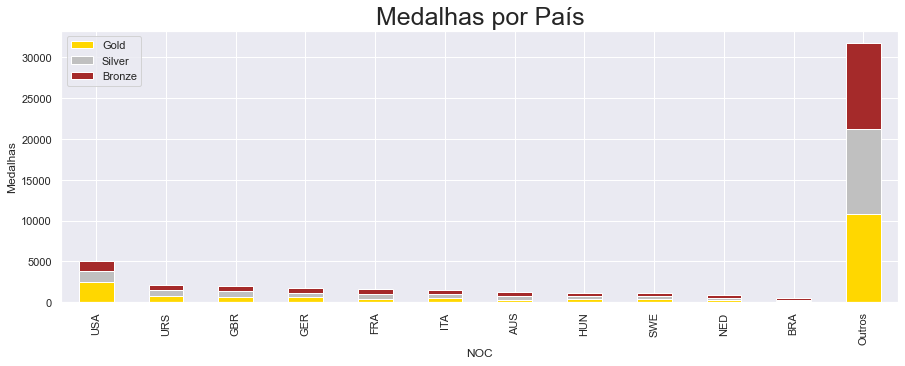

In [79]:
colors = ['gold', 'silver', 'brown']

df_pais_final[['NOC', 'Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, color=colors, x='NOC', figsize=(15,5))

plt.ylabel('Medalhas')
plt.xticks(rotation=90)

plt.title('Medalhas por País', fontsize = 25);

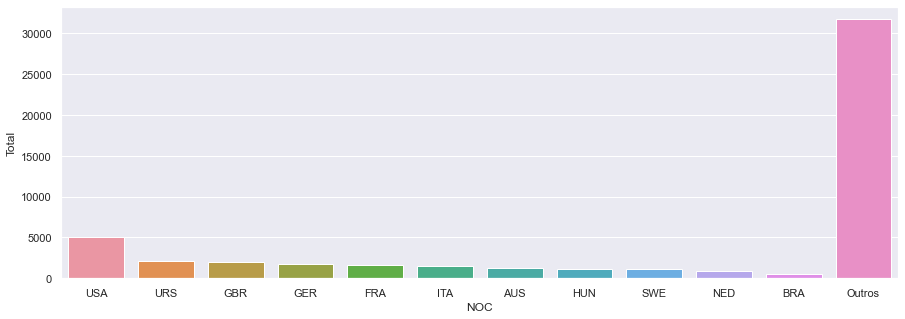

In [80]:
plt.figure(figsize=(15,5))
sns.barplot(data = df_pais_final, x = 'NOC', y = 'Total');